<a href="https://www.kaggle.com/code/kennethnjuguna/kenya-inflation-rate-from-2005-2023?scriptVersionId=149158637" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## This is a notebook Looking at Inflation Rate in the Country from the year 2005-2003


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


**Import the required python libraries to be used with the dataset.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Import the Kenya Inflation Rate dataset.**

In [4]:
#we use pandas to import the required dataset for this EDA
kenyainflationrate=pd.read_csv('/kaggle/input/kenyainflation2005-2023/Inflation Rates.csv')

**View the first five rows of the dataset.**

In [5]:
#We use the head function to check the first five rows of the dataset
kenyainflationrate.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,July,8.68,7.28
1,2023,June,8.77,7.88
2,2023,May,8.78,8.03
3,2023,April,8.71,7.90
4,2023,March,8.59,9.19


**View the last rows of the dataset.**

In [6]:
#We use the tail function to check the last 5 rows of the dataset
kenyainflationrate.tail()

,Year,Month,Annual Average Inflation,12-Month Inflation
219,2005,May,14.61,14.78
220,2005,April,13.76,16.02
221,2005,March,13.07,14.15
222,2005,February,12.60,13.94
223,2005,January,12.27,14.87


**Get Detailed data info  of all attributes in the dataset**

In [7]:
#This function checks for detailed datatypes for each attribute
kenyainflationrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      224 non-null    int64  
 1   Month                     224 non-null    object 
 2   Annual Average Inflation  224 non-null    float64
 3   12-Month Inflation        224 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.1+ KB


**Check for duplicate values within the dataset.**

In [8]:
#This checks for duplicated values within the dataset
kenyainflationrate.duplicated().sum()

1

**Check for missing values within the Kenya Inflation Rate dataset.**

In [9]:
#This will check if the dataset has any missing values or data
missing_data=kenyainflationrate.isnull()
missing_data.head(5)

,Year,Month,Annual Average Inflation,12-Month Inflation
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


**Check in a sum function the total number of Null(missing values) within the dataset**

In [10]:
#You can as well use the code below to get any Null Values
kenyainflationrate.isnull().sum()

Year                        0
Month                       0
Annual Average Inflation    0
12-Month Inflation          0
dtype: int64

**Defining the shape of the dataset.**

In [11]:
#Determing the number of rows and columns within the dataset
kenyainflationrate.shape

(224, 4)

**Summarical statistics of the dataset**

In [12]:
# we use the decribe function to get the summarical statistics of the whole dataset
kenyainflationrate.describe()

,Year,Annual Average Inflation,12-Month Inflation
count,224.000000,224.000000,224.000000
mean,2013.821429,7.724286,7.594688
std,5.379273,3.383510,4.004110
min,2005.000000,3.930000,1.850000
25%,2009.000000,5.407500,5.000000
50%,2014.000000,6.465000,6.405000
75%,2018.250000,8.617500,8.462500
max,2023.000000,17.070000,19.720000


# <h4>Rename the columns.</h4>

In [13]:
kenyainflationrate.rename(columns = {'Annual Average Inflation':'Annual_Average_Inflation'}, inplace = True)

In [14]:
kenyainflationrate.rename(columns = {'12-Month Inflation':'Month_Inflation'}, inplace = True)

**Check for the renamed columns in the dataset.**

In [15]:
kenyainflationrate.head()

,Year,Month,Annual_Average_Inflation,Month_Inflation
0,2023,July,8.68,7.28
1,2023,June,8.77,7.88
2,2023,May,8.78,8.03
3,2023,April,8.71,7.90
4,2023,March,8.59,9.19


**Get the Year, Month with highest Annual Average Inflation and 12 Month Inflation**

In [16]:
#we will utilize the max() function
df = kenyainflationrate
print(kenyainflationrate.max())

Year                             2023
Month                       September
Annual_Average_Inflation        17.07
Month_Inflation                 19.72
dtype: object


**Get the Year, Month with lowest Annual Average Inflation and 12 Month Inflation**

In [17]:
#we will utilize the min() function
df = kenyainflationrate
print(kenyainflationrate.min())

Year                         2005
Month                       April
Annual_Average_Inflation     3.93
Month_Inflation              1.85
dtype: object


# Findings
* September 2023 had the highest Annual average inflation and also 12 Month inflation.
* April 2005 had the lowest Annual average inflation and also 12 Month inflation.


# Graphical representation of the above dataset.

**Visualize the corelation of the whole dataset**

<Axes: >

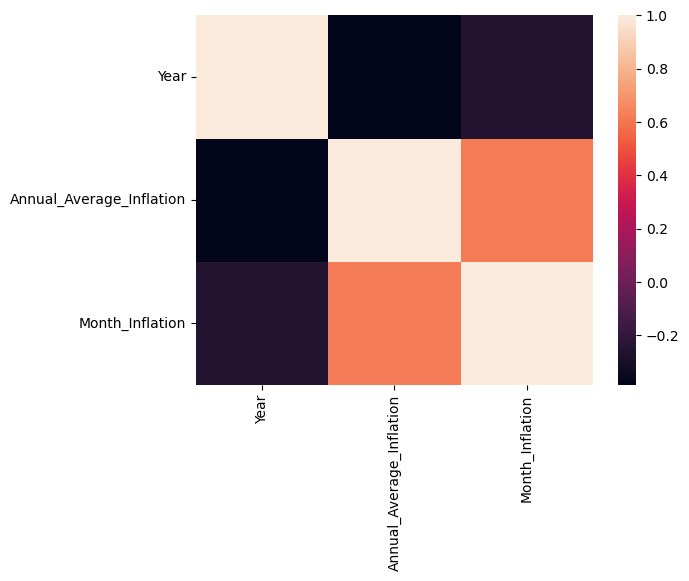

In [18]:
sns.heatmap(kenyainflationrate.corr())

**Let's compare the Annual Average inflation rate of kenya in each year. We will do this by plotting a line graph of the Annual Average inflation rate of the years on the same chart.**

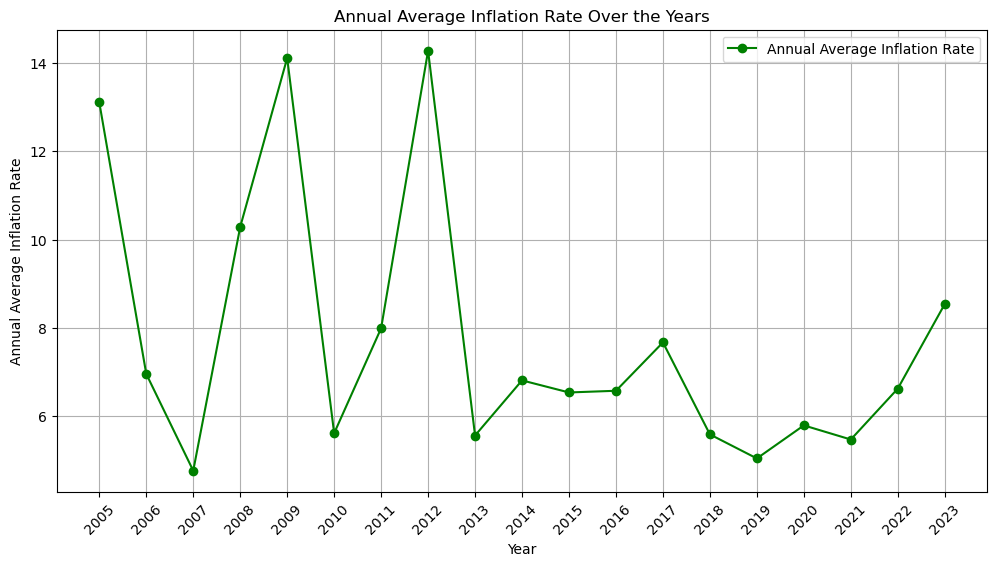

In [19]:
# Group the data by year and calculate the mean Inflation rate for each year
annual_Inflation_data = kenyainflationrate.groupby('Year')['Annual_Average_Inflation'].mean()

# Create a time series plot with years on the x-axis
years = annual_Inflation_data.index
Annual_Average_Inflation = annual_Inflation_data.values

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(years, Annual_Average_Inflation, label='Annual Average Inflation Rate', color='green', marker='o')
plt.title('Annual Average Inflation Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Annual Average Inflation Rate')
plt.xticks(years, rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# <h4>A bar Plot to show Annual Average inflation trend over the year 2023 </h4>

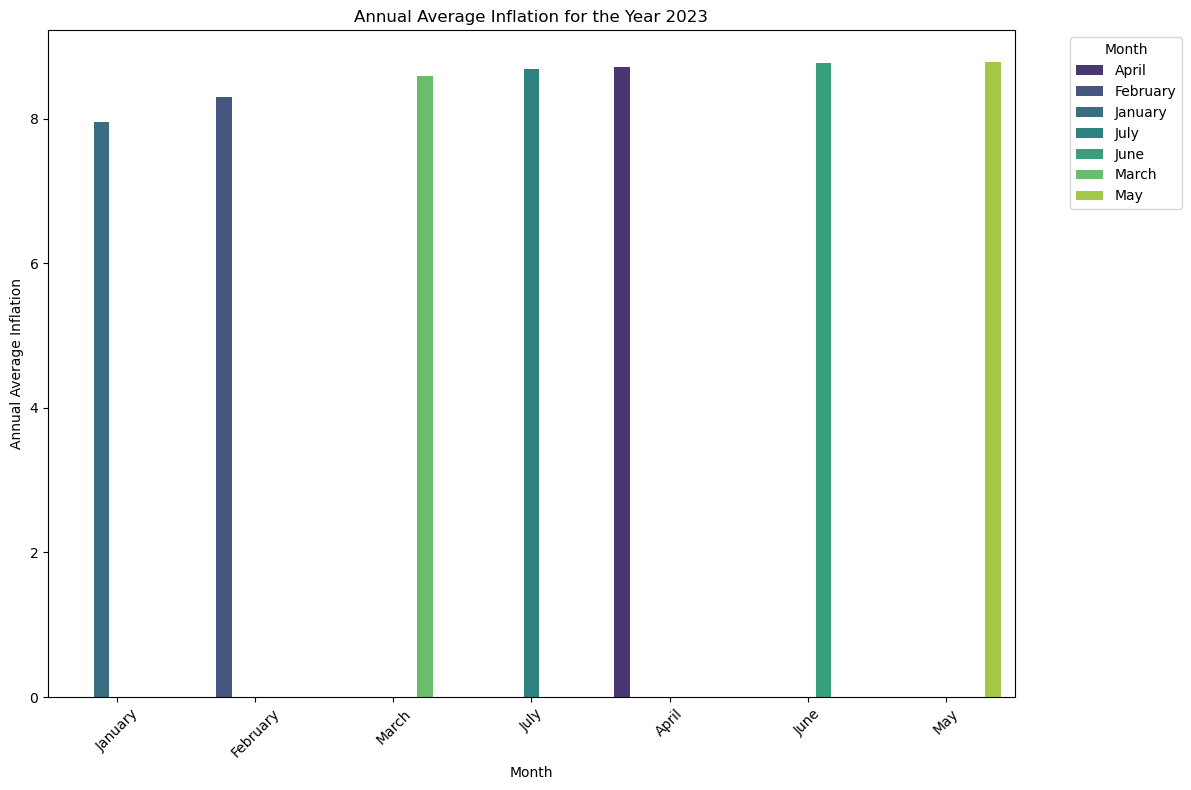

In [20]:
#convert the Column Year from Int into Object to filter on the year
kenyainflationrate['Year'] = kenyainflationrate['Year'].astype(str)
# Group the data by 'Month' and 'Annual Average Inflation', and count Annual Average Inflation for each Month.
Average_Inflation_Rate_By_Month = kenyainflationrate.query("Year=='2023'").groupby(['Month', 'Annual_Average_Inflation']).size().reset_index(name='count')



# Visualize the results using a bar graph with different colors for each Month.
#Visualize the bar plot in ascending order.
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Annual_Average_Inflation',hue='Month', data=Average_Inflation_Rate_By_Month, order=Average_Inflation_Rate_By_Month.sort_values('Annual_Average_Inflation').Month, palette='viridis', )
plt.xlabel('Month')
plt.ylabel('Annual Average Inflation')
plt.title('Annual Average Inflation for the Year 2023')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Confirm the converted Datatype from Int to Object**

# <h4>A bar Plot to show 12-Month inflation trend over the year 2023 </h4>

In [21]:
kenyainflationrate.dtypes

Year                         object
Month                        object
Annual_Average_Inflation    float64
Month_Inflation             float64
dtype: object

# <h4>A bar Plot to show Annual Average inflation trend over the year 2005 </h4>

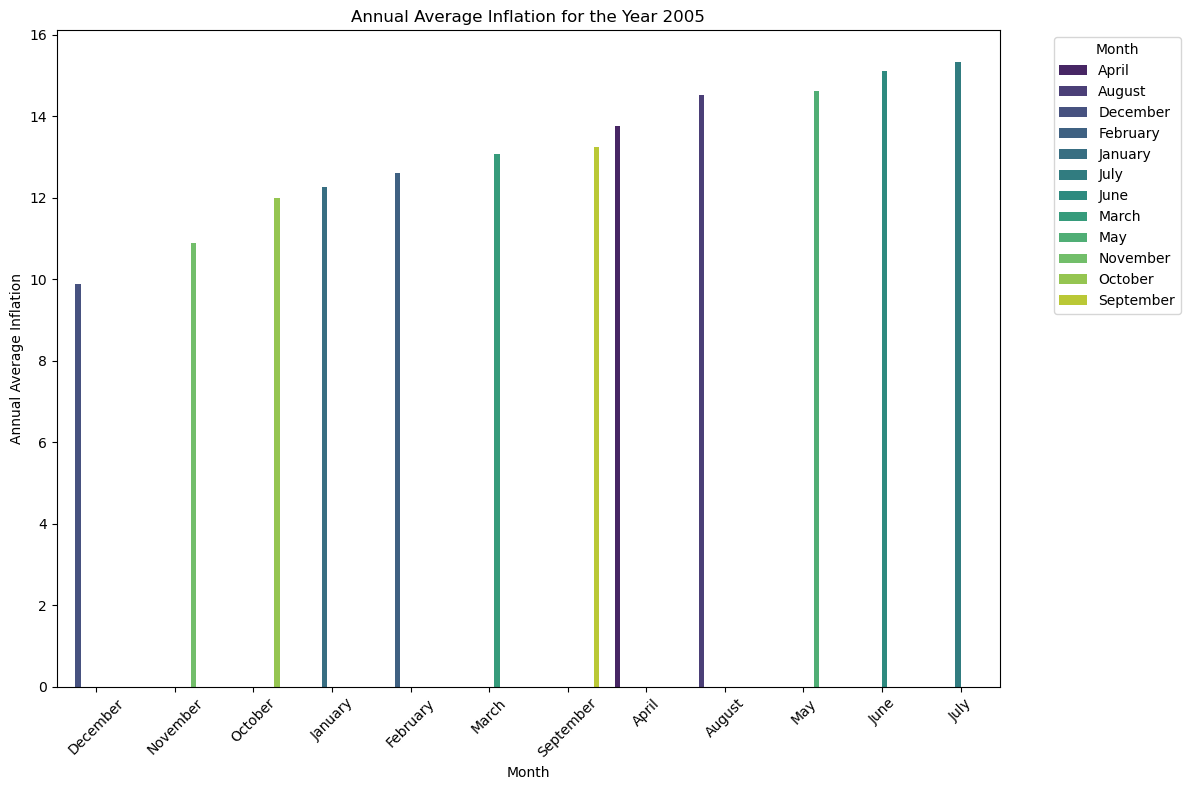

In [22]:
#convert the Column Year from Int into Object to filter on the year
kenyainflationrate['Year'] = kenyainflationrate['Year'].astype(str)
# Group the data by 'Month' and 'Annual Average Inflation', and count Annual Average Inflation for each Month.
Average_Inflation_Rate_By_Month = kenyainflationrate.query("Year=='2005'").groupby(['Month', 'Annual_Average_Inflation']).size().reset_index(name='count')



# Visualize the results using a bar graph with different colors for each Month.
#Visualize the bar plot in ascending order.
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Annual_Average_Inflation',hue='Month', data=Average_Inflation_Rate_By_Month,order=Average_Inflation_Rate_By_Month.sort_values('Annual_Average_Inflation').Month, palette='viridis', )
plt.xlabel('Month')
plt.ylabel('Annual Average Inflation')
plt.title('Annual Average Inflation for the Year 2005')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Findings**
* We can analyze all the years using the above code.
* Case in point in the year 2023 the highest Annual average Inflation was experienced in the month of June and May.
* In the year 2005 highest Annual average inflation was in the month of July.

In [23]:
#convert the Column Year from Object into Int to filter on the year
kenyainflationrate['Year'] = kenyainflationrate['Year'].astype(int)

In [24]:
kenyainflationrate.dtypes

Year                          int64
Month                        object
Annual_Average_Inflation    float64
Month_Inflation             float64
dtype: object

# <h2>Forecasting on the Inflation Rate of Kenya Using ARIMA Model in Python. </h2>

Recently inflation is a popular topic in Kenya. Experts presume inflation in Kenya should continue to rise, and by the end of 2023 it will be close to 8.8%. In this notebook we will develop a forecasting model for time series using Python.

**Understanding inflation**
<p>Inflation is a general progressive increase in prices of goods and services, or decline in the value of money. It is one of the basic measures describing the economy of a given country. The most easy way to pull back inflation is to raise interest rates. When interest rates are low, individuals and businesses tend to demand more loans.</p>

**What causes inflation in Kenya?**
<p>Economies in most regions of the world are struggling with increased inflation, which is due to: rising fuel prices, disruptions in supply chains and a strong postpandemic recovery. The strong price pressure in Kenya is also due to the continued high pace of fuel prices and further increases in food prices.</p>

# 1. Loading and Preprocessing the data.

**Look at the Dataset we will be working with on the forecasting.**

In [25]:
#we use the head function to check the Dataset we are working with.
kenyainflationrate.head()


,Year,Month,Annual_Average_Inflation,Month_Inflation
0,2023,July,8.68,7.28
1,2023,June,8.77,7.88
2,2023,May,8.78,8.03
3,2023,April,8.71,7.90
4,2023,March,8.59,9.19


In [26]:
#convert the Column Year from Object into Int as needed.
kenyainflationrate['Year'] = kenyainflationrate['Year'].astype(int)

In [27]:
#convert the column Month from Object into String
kenyainflationrate['Month'].astype(str)

0          July
1          June
2           May
3         April
4         March
         ...   
219         May
220       April
221       March
222    February
223     January
Name: Month, Length: 224, dtype: object

In [28]:
#Confirm the dtypes
kenyainflationrate.dtypes

Year                          int64
Month                        object
Annual_Average_Inflation    float64
Month_Inflation             float64
dtype: object

**Drop the Annual Average Inflation since we will be forecasting with the Month Inflation and rename the new dataframe to KenyaInflationforecast.**

In [29]:
kenyainflationforecast = kenyainflationrate.drop(['Annual_Average_Inflation'],axis=1)

In [30]:
kenyainflationforecast.head()

,Year,Month,Month_Inflation
0,2023,July,7.28
1,2023,June,7.88
2,2023,May,8.03
3,2023,April,7.90
4,2023,March,9.19


**Convert the months into Numerical values on the dataset**

In [31]:
#We will use the calendar and dictionaries to convert the months on the dataset to continous numerical values.
import calendar

month_dict = dict((v, k) for k, v in enumerate(calendar.month_name))

print(month_dict)

print('-' * 50)

#Convert on the dataset- kenyainflationrate

kenyainflationforecast['Month'] = kenyainflationforecast['Month'].map(month_dict)
kenyainflationforecast.head()

{'': 0, 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
--------------------------------------------------


,Year,Month,Month_Inflation
0,2023,7,7.28
1,2023,6,7.88
2,2023,5,8.03
3,2023,4,7.90
4,2023,3,9.19


In [32]:
kenyainflationforecast.dtypes

Year                 int64
Month                int64
Month_Inflation    float64
dtype: object

In [33]:
# add new date column and assign last day of month
from pandas.tseries.offsets import MonthEnd
kenyainflationforecast['Date'] = pd.to_datetime(kenyainflationforecast[['Year', 'Month']].assign(DAY=1)) + MonthEnd(1)

# order ascending data values 
kenyainflationforecast= kenyainflationforecast.sort_values(by=['Date'])
kenyainflationforecast.head()

,Year,Month,Month_Inflation,Date
223,2005,1,14.87,2005-01-31
222,2005,2,13.94,2005-02-28
221,2005,3,14.15,2005-03-31
220,2005,4,16.02,2005-04-30
219,2005,5,14.78,2005-05-31


**Use the needed columns and drop those that aren't needed on the dataset.**

In [34]:
# select needed columns
Prediction = kenyainflationforecast[['Date', 'Month_Inflation']]

# set date column as index
Prediction.set_index('Date', inplace=True)

# drop NaN rows
Prediction.dropna(subset=['Month_Inflation'], inplace=True)
Prediction.tail()

,Month_Inflation
Date,
2023-03-31,9.19
2023-04-30,7.90
2023-05-31,8.03
2023-06-30,7.88
2023-07-31,7.28


**View summary of the finalised Dataset**

In [35]:
#summary of finalised dataset
Prediction.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month_Inflation,224.0,7.594688,4.00411,1.85,5.0,6.405,8.4625,19.72


In [36]:
Prediction.dtypes

Month_Inflation    float64
dtype: object

# 2. Visualizing Time Series

Dataset is ready to plot some figures

<Axes: xlabel='Date'>

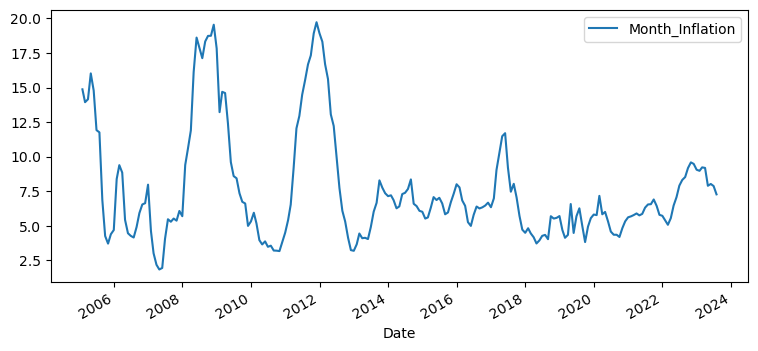

In [37]:
# time series of inflation percentage
kenyainflationforecast.plot(x='Date', y='Month_Inflation', figsize=(9,4))

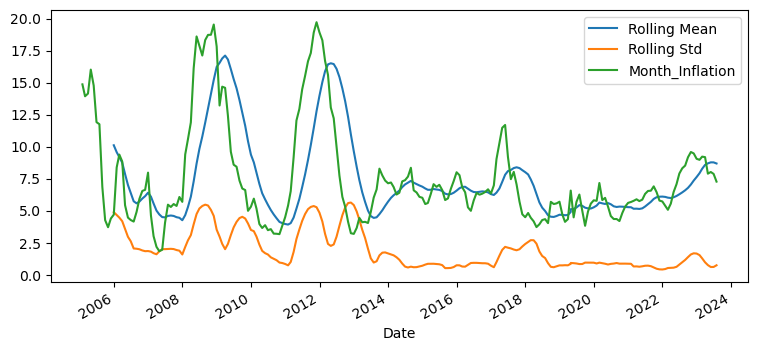

In [38]:
# more time series of inflation percentage
time_series = Prediction['Month_Inflation']
time_series.rolling(window=12).mean().plot(label='Rolling Mean')
time_series.rolling(window=12).std().plot(label='Rolling Std')
time_series.plot(figsize=(9,4))
plt.legend()
plt.show()

From this graph above we can see Kenya inflation is a complex measure. The standard deviation is not flattened and the behaviour seems to be quite dynamic in time.

To understand more about our time series and get more insights for future predicting, we will plot it's decomposition. These components are defined as follows:
<ul>
    <li>observed: the actual value in the series;</li>
    <li>trend: the increasing or decreasing value in the series;</li>
    <li>seasonality: the repeating short-term cycle or pattern in the series;</li>
    <li>residual/noise: the random variation in the series.</li>
   
</ul>

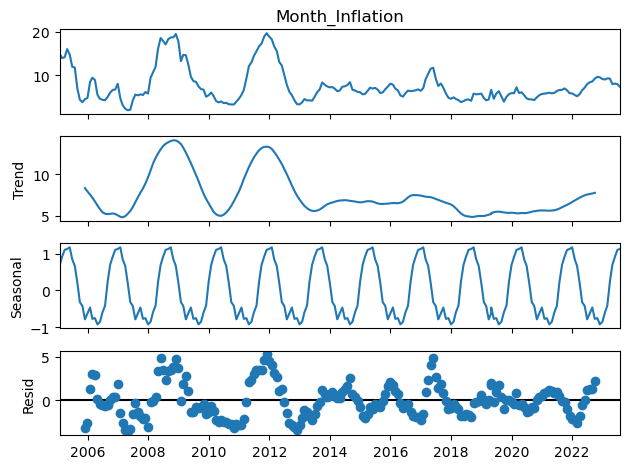

In [39]:
# plot decomposition components
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(time_series, period=20)
fig = decomp.plot()

# 3. Introduction to ARIMA Model

ARIMA (aka Box-Jenkins) is an acronym that is short for Auto Regressive Integrated Moving Average. It is a class of model that that captures a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

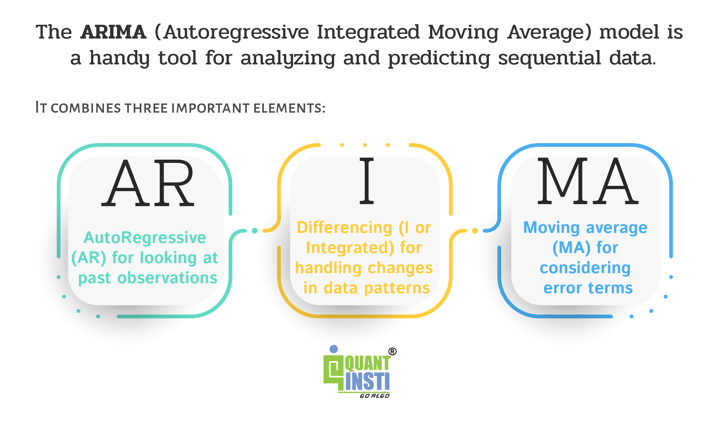!

A statistical model is autoregressive if it predicts future values based on past values. For example, an ARIMA model might seek to predict a stock's future prices based on its past performance or forecast a company's earnings based on past periods.

**KEY TAKEAWAYS**
<ul>
    <li>Autoregressive integrated moving average (ARIMA) models predict future values based on past values.</li>
    <li>ARIMA makes use of lagged moving averages to smooth time series data.</li>
    <li>They are widely used in technical analysis to forecast future security prices.   </li>
    <li>Autoregressive models implicitly assume that the future will resemble the past.</li>
<li>Therefore, they can prove inaccurate under certain market conditions, such as financial crises or periods of rapid technological change.</li>
   
</ul>

Any non-seasonal time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models. Seasonal changes or patterns require extending this model into Seasonal ARIMA (SARIMA) by adding seasonal terms. Since inflation in Kenya is definitely non-seasonal, this type of model should fit great.

To build an accurate statistical model it is crucial to know its parameters (p, d, q) which are integer values.

The parameters of the ARIMA model are defined as follows:
<ul>
    <li>p: number of lag observations included in the model, also called the lag order (AR term);</li>
<li>d: number of times that the raw observations are differenced, also called the degree of differencing (I term);</li>
    <li>q: number of differencing required to make the time series stationary (MA term).</li>
</ul>
We need to find the value of each term, but before that we must check if our dataset is stationary.

# 4. Identifying if the Data is Stationary.

To check if the inflation series is stationary, we will implement the Augmented Dickey Fuller (ADF) test. To identify the nature of data, we will be using the null hypothesis.

The null hypothesis (HO
) of the ADF test is that the data is non stationary. If the P-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the series is indeed stationary.

So, in other words, if P-value is greater the 0.05 (data is non stationary) we will need to find the order of differencing. Otherwise, we can assign it is equal 0.

In [40]:
# check if inflation series is stationary
from statsmodels.tsa.stattools import adfuller

# ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('1. ADF: ', result[0])
    print('2. P-value: ', result[1])
    print('3. Num of Lags: ', result[2])
    print('4. Num of Observations: ', result[3])
    print('5. Critial Values:')
    for key, value in result[4].items():
        print('\t', key, ': ', value)
        
    if result[1] <= 0.05:
        print('\nStrong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary.')
    else:
        print('\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.')

# run function
adf_test(Prediction['Month_Inflation'])

1. ADF:  -3.126210452314965
2. P-value:  0.024673328773233402
3. Num of Lags:  15
4. Num of Observations:  208
5. Critial Values:
	 1% :  -3.4621857592784546
	 5% :  -2.875537986778846
	 10% :  -2.574231080806213

Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary.


P-value is below 0.05 which means our data series is stationary. We can skip finding d term but for this purpose we will show methodology of determining it in the next step.

# 4.  Differencing - Determining d Order

Using pmdarima package we can easily find value of d term with different tests. Since our time series is stationary, we will still accept d term to be 0 because there is no need of calculating it.

In [41]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
# finding differencing value
from pmdarima.arima.utils import ndiffs
print(ndiffs(Prediction['Month_Inflation'], test='adf'))
print(ndiffs(Prediction['Month_Inflation'], test='kpss'))
print(ndiffs(Prediction['Month_Inflation'], test='pp'))

0
1
0


# 6. Autocorrelation (ACF) and Partial Autocorrelation (PACF) - Determining p and q Order

Autocorrelation it is a statistic describing the extent to which a given term of the series depends on the previous terms in the time series (with a constant time shift). Partial autocorrelation expresses the correlation between observations made at two points in time while accounting for any influence from other observations.

By plotting ACF and PACF we are able to determine p and q. We can use ACF to determine the optimal number of MA terms and PACF to determine the optimal number of terms to use in the AR model.

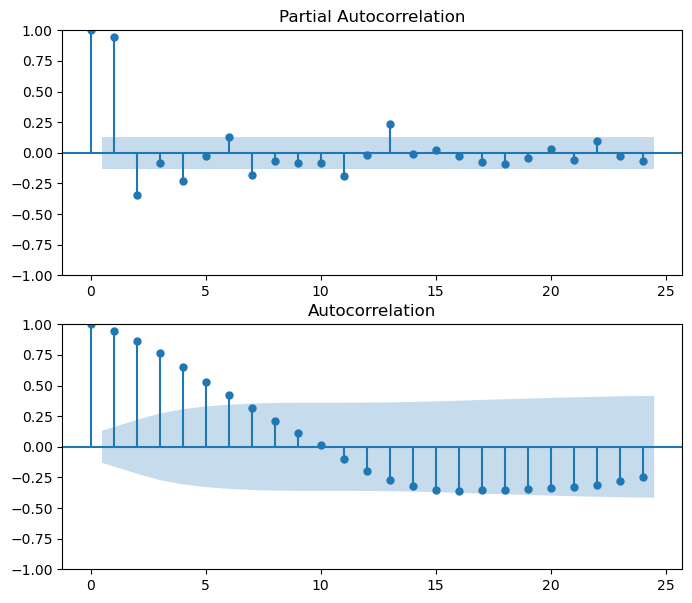

In [43]:
# plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(2,1,1)
fig = plot_pacf(Prediction, ax=ax1)
ax2 = fig.add_subplot(2,1,2)
fig = plot_acf(Prediction, ax=ax2)
plt.show()

#  7. Auto ARIMA Function to Find Best Order for Model

Auto ARIMA is another function which can help us find the best fit and determine our three parameters in an automatic way. It uses a stepwise approach to search multiple combinations of (p, d, q) terms and chooses the best model that has the least AIC. For this task we will again use pmdarima module. We will just demonstrate it and not implement its results for final model.

In [44]:
# auto ARIMA function
from pmdarima import auto_arima
stepwise_fit = auto_arima(Prediction['Month_Inflation'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=686.304, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=715.692, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=682.991, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=684.321, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=713.873, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=684.966, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=684.879, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=686.247, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=681.094, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=683.070, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=682.988, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=682.446, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=684.354, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.826 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  224
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -338.547
Date:                Fri, 03 Nov 2023   AIC                            681.094
Time:                        10:35:32   BIC                            687.908
Sample:                             0   HQIC                           683.845
                                - 224                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3798      0.052      7.357      0.000       0.279       0.481
sigma2         1.2186      0.068     17.899      0.000       1.085       1.352
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               133.41
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The function suggests (1,1,0) to be the best order.

# 8. Developing the ARIMA Model.

Now, that we determined and know the values of our order, we can finally implement it to ARIMA model.

In [45]:
Prediction.head()

,Month_Inflation
Date,
2005-01-31,14.87
2005-02-28,13.94
2005-03-31,14.15
2005-04-30,16.02
2005-05-31,14.78


In [46]:
# p=2, d=0, q=1
from statsmodels.tsa.arima.model import ARIMA

# fitting the model
model = ARIMA(Prediction['Month_Inflation'], order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Month_Inflation   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -338.547
Date:                Fri, 03 Nov 2023   AIC                            681.094
Time:                        10:35:32   BIC                            687.908
Sample:                             0   HQIC                           683.845
                                - 224                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3798      0.052      7.357      0.000       0.279       0.481
sigma2         1.2186      0.068     17.899      0.000       1.085       1.352
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               133.41
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# predict values
pred = model_fit.predict(start=0, end=len(df) - 1, typ='levels', dynamic=False)

In [48]:
# display last rows
pred.tail()

Date
2023-03-31    9.324958
2023-04-30    9.174807
2023-05-31    7.410019
2023-06-30    8.079378
2023-07-31    7.823025
Name: predicted_mean, dtype: float64

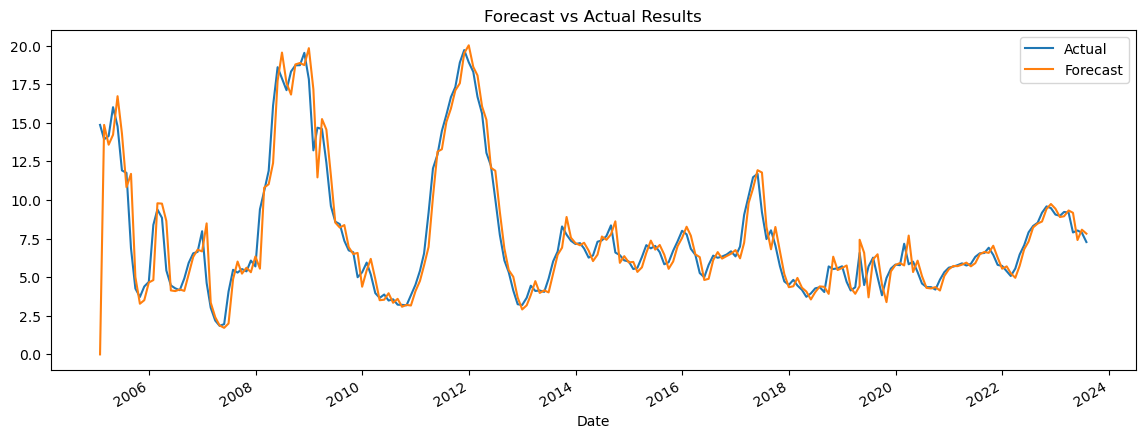

In [49]:
# plot results
Prediction['Month_Inflation'].plot(legend=True, label='Actual', figsize=(14,5))
pred.plot(legend=True, label='Forecast')
plt.title('Forecast vs Actual Results')
plt.show()

# 9. Accuracy Metrics and Measure Performance of Fitted Model

We will plot diagnostics and calculate some accuracy metrics to judge the performance of our model.

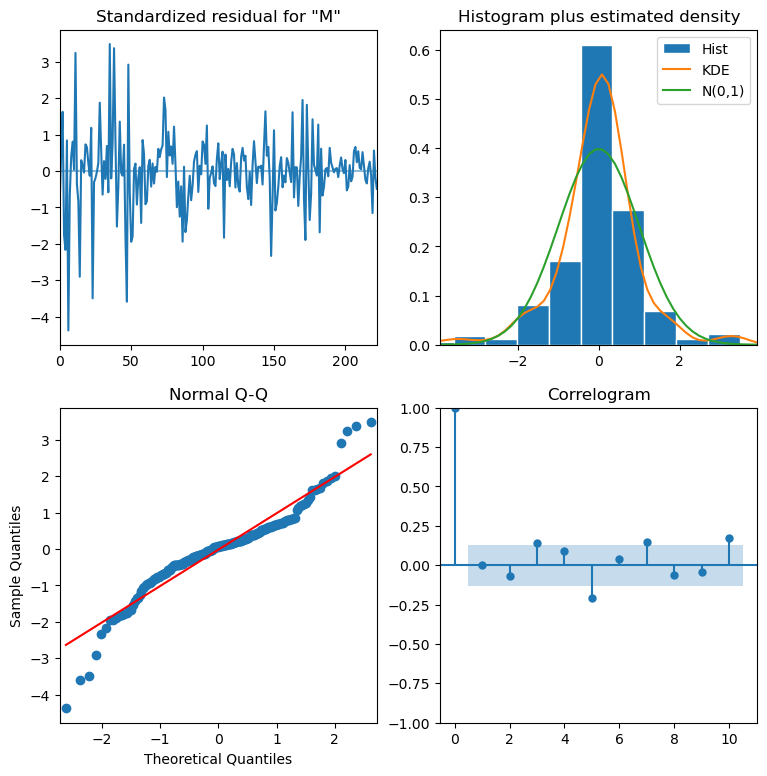

In [50]:
# diagnostic plots for standardized residuals of one endogenous variable
model_fit.plot_diagnostics(figsize=(9,9))
plt.show()

<p><b>Top left plot:</b> The residual errors seem to fluctuate around a mean of zero and have a uniform variance.</p>